<a href="https://colab.research.google.com/github/aslamtp/CatsAndDogs/blob/main/CatsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snmahsa/animal-image-dataset-cats-dogs-and-foxes")

print("Path to dataset files:", path)

100%|██████████| 388M/388M [00:10<00:00, 40.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes/versions/1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
# prompt: i want to create xtrain,ytraint,xtest and ytest from the above downloaded data

import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split


# Define the path to the downloaded dataset
dataset_path = os.path.join(path, 'animal_dataset')

# Add a print statement to check if the dataset path exists and list its contents
print(f"Checking dataset path: {dataset_path}")
if not os.path.exists(dataset_path):
    print(f"Error: Dataset path does not exist: {dataset_path}")
else:
    print(f"Contents of dataset path: {os.listdir(dataset_path)}")


# Define the categories and create labels
categories = ['cats', 'dogs', 'foxes']
labels = {category: i for i, category in enumerate(categories)}

# Prepare lists for images and labels
images = []
image_labels = []
loaded_image_count = 0 # Counter for successfully loaded images

# Loop through categories and images
for category in categories:
    category_path = os.path.join(dataset_path, category)
    print(f"Checking category path: {category_path}") # Check category path
    if os.path.exists(category_path):
        print(f"Contents of category path: {os.listdir(category_path)[:5]}...") # Print first 5 files
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                # Open and resize the image
                img = Image.open(img_path).resize((64, 64)).convert('RGB') # Resize to 64x64, convert to RGB
                images.append(np.array(img))
                image_labels.append(labels[category])
                loaded_image_count += 1 # Increment counter
            except Exception as e:
                print(f"Error loading image {img_path}: {e}") # Print specific error

# Print the total number of images loaded
print(f"Successfully loaded {loaded_image_count} images.")

# Convert lists to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# Check if any images were loaded before attempting to split the data
if loaded_image_count > 0:
    # Normalize images (scale pixel values to 0-1)
    images = images / 255.0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, image_labels, test_size=0.2, random_state=42, stratify=image_labels)

    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)
else:
    print("No images were loaded. train_test_split cannot be performed.")

Checking dataset path: /root/.cache/kagglehub/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes/versions/1/animal_dataset
Contents of dataset path: ['.ipynb_checkpoints', 'cats', 'dogs', 'foxes']
Checking category path: /root/.cache/kagglehub/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes/versions/1/animal_dataset/cats
Contents of category path: ['cat032.jpg', 'cat006.jpg!d', 'cat019.jpeg', 'cat023.jpeg', 'cat069.jpg']...
Error loading image /root/.cache/kagglehub/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes/versions/1/animal_dataset/cats/cat008.svg: cannot identify image file '/root/.cache/kagglehub/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes/versions/1/animal_dataset/cats/cat008.svg'
Checking category path: /root/.cache/kagglehub/datasets/snmahsa/animal-image-dataset-cats-dogs-and-foxes/versions/1/animal_dataset/dogs
Contents of category path: ['dog003.jpeg', 'dog049.jpg', 'dog061.jpg', 'dog013.jpeg', 'dog096.jpg']...
Checking category pa

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))) # Change 1: Update input_shape
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax')) # Change 2: Update the number of output neurons

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 0.2954 - loss: 2.0000 - val_accuracy: 0.2258 - val_loss: 1.1487
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.3610 - loss: 1.0806 - val_accuracy: 0.3871 - val_loss: 1.1415
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5720 - loss: 0.9634 - val_accuracy: 0.4194 - val_loss: 1.1237
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7321 - loss: 0.8136 - val_accuracy: 0.4355 - val_loss: 1.1501
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.7539 - loss: 0.7146 - val_accuracy: 0.4032 - val_loss: 1.1803
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7933 - loss: 0.6106 - val_accuracy: 0.3871 - val_loss: 1.1772
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8425 - loss: 0.4704 - val_accuracy: 0.4032 - val_loss: 1.3244
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8460 - loss: 0.4338 - val_accuracy: 0.4194 - val_loss:

In [ ]:
# Evaluate the model on the test data
losaccuracy = model.evaluate(X_test, y_test) # Changed x_test to X_test

# Unpack the results into separate loss and accuracy variables
loss = losaccuracy[0]
accuracy = losaccuracy[1]

# Print the loss and accuracy
print(f"loss: {loss}")
print(f"accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4899 - loss: 1.3004
loss: 1.2366429567337036
accuracy: 0.5161290168762207


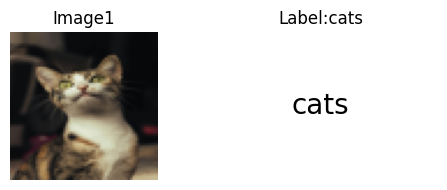

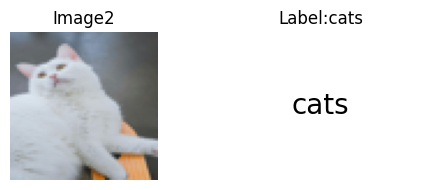

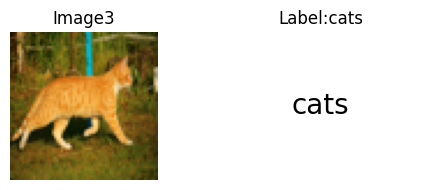

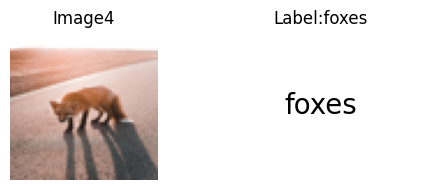

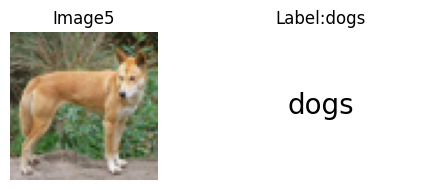

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a mapping from numerical labels back to category names
label_to_category = {0: 'cats', 1: 'dogs', 2: 'foxes'}

for i in range(5):

  plt.figure(figsize = (5,2))
  plt.subplot(1,2,1)
  # Remove the reshape(64, 64) as X_test[i] is already in the correct shape for imshow with RGB data
  plt.imshow(X_test[i])
  plt.title(f"Image{i+1}")
  plt.axis('off')

  plt.subplot(1,2,2)
  # Use the dictionary to get the category name from the numerical label
  category_name = label_to_category[y_test[i]]
  plt.text(0.5,0.5,category_name, fontsize = 20, ha = 'center', va = 'center')
  plt.title(f"Label:{category_name}")
  plt.axis('off')
  plt.tight_layout()
  plt.show()